
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
-------------------------------------------------------------------------------------------------------------------------------The question that we should ask is What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [3]:
# Load data and print out the first 5 lines.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Get the number of rows and columns
df.shape

(110527, 14)

<a id='Check for NULL values'></a>
## Check for NULL values

In [5]:
# Get the number of non-null values in each column to check for missing values and get the data types for each column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='Check for NULL values'></a>
## There is no null values

<a id='Check for values'></a>
## Check for duplicates

In [6]:
#Get the number of duplicated values
df.duplicated().sum()

0

<a id='Check for NULL values'></a>
## There is no duplicated values

<v id='Some statistics'></v>
## Some statistics

> **Note**: The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


In [7]:
# generate descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='Check for NULL values'></a>
## We don't need the patient ID and Appointment ID columns to make the analysis

In [8]:
# Drop the not important columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

<a id='Check for NULL values'></a>
## Check for changes

In [9]:
# Show the first row
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='Check for NULL values'></a>
## Rename the No-show column name

In [10]:
# change the '-' with '_' in the No-show column
df.rename(columns={'No-show': 'No_show'},inplace=True)

<a id='Check for NULL values'></a>
## show the columns names to check the changes in 'No-show' column name

In [11]:
# Columns names
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show'],
      dtype='object')

### Data Cleaning (We don't need to make cleaning as there is no NULL or Duplicated values)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which feature is important to study the showing of patients?)

In [12]:
# patients who show
show=df[df['No_show']=='No']
show.shape

(88208, 12)

In [13]:
# patients who don't show
No_show=df[df['No_show']=='Yes']
No_show.shape

(22319, 12)

In [14]:
# Number of males and females who show (to Check if there is a relation with gender)
show.Gender.value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

In [15]:
# Number of males and females who don't show (to Check if there is a relation with gender)
No_show.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [16]:
# Number of males and females who recieved the sms and who don't recieve it (to Check if there is a relation with gender)
No_show.groupby('SMS_received')['Gender'].value_counts()

SMS_received  Gender
0             F         7874
              M         4661
1             F         6720
              M         3064
Name: Gender, dtype: int64

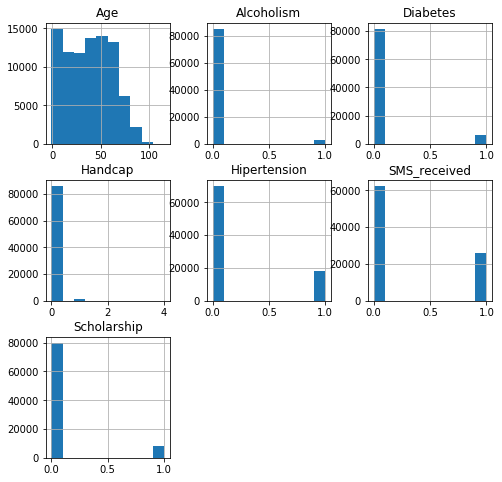

In [17]:
# histogram for all features for patients who show
show.hist(figsize=(8,8));

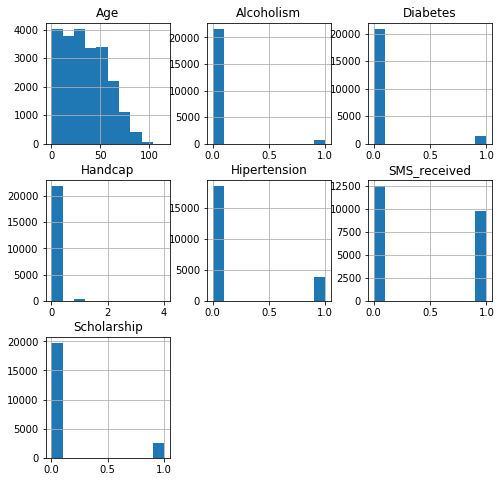

In [18]:
# histogram for all features for patients who don't show
No_show.hist(figsize=(8,8));

In [19]:
# Patients who don't show
NotShowed=df.No_show=='Yes'

In [20]:
# Patients who show
showed=df.No_show=='No'

In [21]:
# Mean of Patients who recieved the sms and show
df.SMS_received[showed].mean()

0.29133411935425357

In [22]:
# Mean of Patients who recieved the sms and don't show
df.SMS_received[NotShowed].mean()

0.43837089475334917

<a id='Check for NULL values'></a>
## And so on.. we will get the mean of each feature in case of showing and in case of not showing to determine the numerical feature that affect on the showing or not showing

In [23]:
df.Handcap[showed].mean()

0.022741701432976602

In [24]:
df.Handcap[NotShowed].mean()

0.020296608270979882

In [25]:
df.Alcoholism[showed].mean()

0.030416742245601307

In [26]:
df.Alcoholism[NotShowed].mean()

0.030332900219543886

In [27]:
df.Diabetes[showed].mean()

0.073836840195900602

In [28]:
df.Diabetes[NotShowed].mean()

0.064070970921636272

In [29]:
df.Hipertension[showed].mean()

0.20439189189189189

In [30]:
df.Hipertension[NotShowed].mean()

0.16900398763385457

In [31]:
df.Scholarship[showed].mean()

0.093903047342644652

In [32]:
df.Scholarship[NotShowed].mean()

0.11550696715802679

In [33]:
df.Age[showed].mean()

37.790064393252315

In [34]:
df.Age[NotShowed].mean()

34.317666562121957

### The SMS_received feature is so important to make the analysis and prediction

### Research Question 2  (what is the percentage of patients who recived the SMS and didn't show?)

In [47]:
#All patients who received the SMS
sms= df[df['SMS_received']==1]

In [48]:
# Patients who Recived the SMS and don't Show
sms_noShow= sms[sms['No_show']=='Yes']

In [50]:
# Percentage of patients who recived the SMS and didn't show
percentage1= len(sms_noShow)*100/len(sms)

### The result is 27.57 %

### Research Question 3  (what is the percentage of patients who recived the SMS and show?)

In [51]:
# Patients who Recived the SMS and Show
sms_Show= sms[sms['No_show']=='No']

In [53]:
# Percentage of patients who recieved the SMS and show
percentage2 = len(sms_Show)*100/len(sms)

### The result is 72.42 %

In [78]:
pieLabels1='SMS recived and do not show','SMS recived and show'

In [79]:
populationShare1 = [percentage1,percentage2]

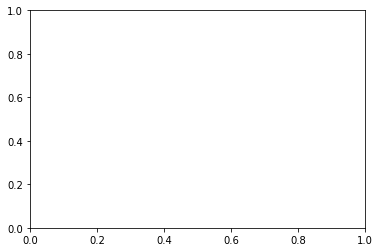

In [80]:
figureObject1, axesObject1 = plt.subplots()

### Pie chart for who recieved the SMS

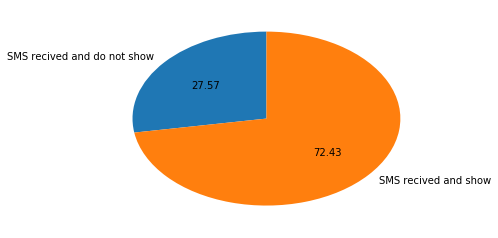

In [81]:
plt.pie(populationShare1,

        labels=pieLabels1,

        autopct='%1.2f',

        startangle=90);

<a id='Check for NULL values'></a>
## As shown the percentage of people who recieved the sms and show is bigger than the percentage of people who recieved the sms and don't show

### Research Question 4  (what is the percentage of patients who didn't recive the SMS and Not show?)

In [82]:
#All patients who don't receive the SMS
Nosms= df[df['SMS_received']==0]

In [83]:
# Patients who don't Recive the SMS and don't Show
Nosms_noShow= Nosms[Nosms['No_show']=='Yes']

In [84]:
percentage3= len(Nosms_noShow)*100/len(Nosms)

### The result is 16.70 %

### Research Question 5  (what is the percentage of patients who didn't recive the SMS and show?)

In [85]:
# Patients who don't Recive the SMS and Show
Nosms_Show= Nosms[Nosms['No_show']=='No']

In [86]:
percentage4= len(Nosms_Show)*100/len(Nosms)

### The result is 83.30 %

In [87]:
pieLabels2='SMS not recived and do not show','SMS not recived and show'

In [88]:
populationShare2 = [percentage3,percentage4]

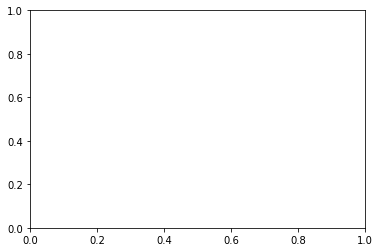

In [89]:
figureObject2, axesObject2 = plt.subplots()

### Pie chart for who don't recieve the SMS

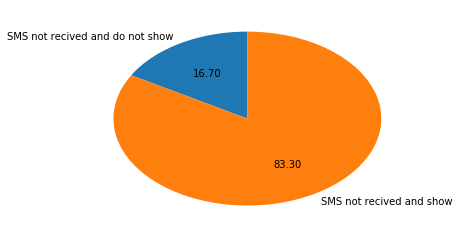

In [90]:
plt.pie(populationShare2,

        labels=pieLabels2,

        autopct='%1.2f',

        startangle=90);

<a id='Check for NULL values'></a>
## As shown the percentage of people who don't recieve the sms and show is bigger than the percentage of people who don't recieve the sms and don't show

<a id='conclusions'></a>
## Conclusions


In [91]:
pieLabels='recived and did not show','recived and show','did not recive and did not show','did not recive and show'

In [92]:
populationShare = [percentage1,percentage2,percentage3,percentage4]

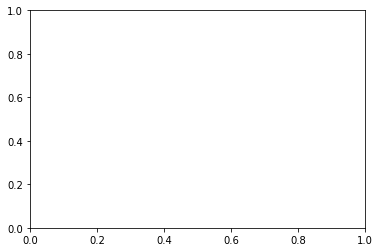

In [93]:
figureObject, axesObject = plt.subplots()

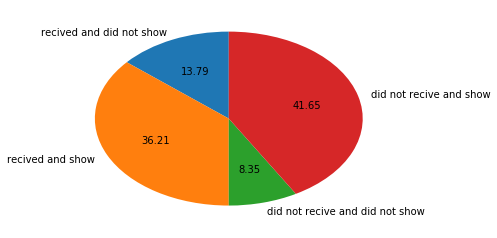

In [94]:
plt.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90);

<a id='conclusions'></a>
## As showen in the pie charts that most of patients are shown in case of recieving the SMS or not, but for patients who don't show: the percentage of patients who don't show and recieved the SMS is bigger than the percentage of patients who don't show and don't recieve the SMS

<a id='conclusions'></a>
## The conclusion: May be there is a problem in the SMS so the patients who recieved the SMS and didn't show are bigger than the patients who didn't recieve the SMS and didn't show (May be the instructions included in the SMS are hard for patients to follow or something else) and May be there is no problem in the SMS and this analysis is not accurate so we get these percentages because of The limitations of any data analysis as we (almost always) are working with sample data, which implies uncertainty (a different sample may lead to different results).     we (almost always) find issues with the sample of data that we are working with (missing observations, data that appears to be inconsistent (for example, movies with a zero budget)